In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy.optimize import curve_fit

#set the default plot parameter
plt_param={'font.family':'serif',
           'font.serif':'Times New Roman',
           'lines.linewidth':1,
           'xtick.labelsize':12,
           'ytick.labelsize':12,
           'axes.labelsize':16,
           'xtick.direction':'in',
           'ytick.direction':'in',
           'font.style':'italic',
           'font.weight':'normal',
           'figure.figsize':[5,5],'xtick.minor.visible':True,
           'ytick.minor.visible':True,
           'xtick.major.size':4,
           'ytick.major.size':4,
           'xtick.minor.size':2,
           'ytick.minor.size':2,
           'xtick.major.width':.8,
           'ytick.major.width':.8,
           'xtick.top':True,
           'ytick.right':True,
           'axes.spines.bottom':True,
           'axes.spines.top':True,
           'axes.spines.left':True,
           'axes.spines.right':True,
           'xtick.bottom':True,
           'xtick.labelbottom':True,
           'ytick.left':True,
           'ytick.labelleft':True}
rcParams.update(plt_param)

 定义拟合函数 
 $y=\frac{a}{1+b\dot e^{c\dot (x+d)}}$

In [4]:
def func(x,a,b,c,d):
    
    y=a/(1+b*np.exp(c*(x+d)))
    
    return y
   

带入观测量并进行函数拟合

In [5]:
x=np.array([0,2,4,6])
y=np.array([3234960,4032160,5135760,5107200])/5135760 #对自变量做归一化 方便拟合

#参数拟合， popt是最佳拟合参数， pco是参数的不确定度
popt,pco=curve_fit(func,x,y)

In [6]:
popt

array([ 1.07174272,  1.36574502, -0.43757864,  1.42631433])

拟合参数如下：
$a=1.07174272 \cdot 5135760$, $b=1.36574502$, $c=-0.43757864$, $d=1.42631433$

不确定度= fit parameter*0.1

做拟合曲线

In [7]:
x_fit=np.linspace(-10,10,1000)
y_fit=func(x_fit,*popt)

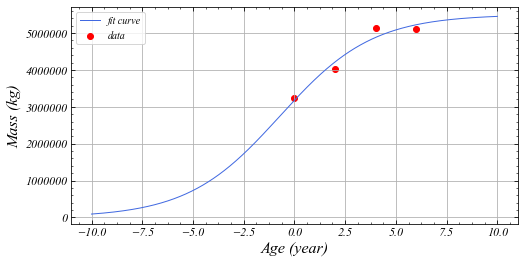

In [13]:
fig,ax=plt.subplots(1,1)
ax.plot(x_fit,y_fit*5135760,label='fit curve',c='royalblue')
ax.scatter(x,y*5135760,label='data',c='red')
ax.grid()
ax.set_xlabel('Age (year)')
ax.set_ylabel('Mass (kg)')
plt.legend()
dic='/Users/shiwuzhang/'
plt.rcParams['figure.figsize'] = [8, 4]
plt.savefig(dic+'fit_curve.png',dpi=300)
# plt.show()